In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Делаем общий датафрейм для всех городов**

In [ ]:
df_tatarstan = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/tatarstan.csv',  error_bad_lines=False, delimiter= ',')
df_altai = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/ALTAI.csv',  error_bad_lines=False, delimiter= ',')
df_bashkortostan = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/Bashkorst.csv',  error_bad_lines=False, delimiter= ',')
df_Moskva = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/MSK.csv',  error_bad_lines=False, delimiter= ',')
df_SPB = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/SPB.csv',  error_bad_lines=False, delimiter= ',')
df_novosib = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/novosib.csv',  error_bad_lines=False, delimiter= ',')
df_saratov = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/saratov.csv',  error_bad_lines=False, delimiter= ',')
df_sevastopol = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/sevastopol.csv',  error_bad_lines=False, delimiter= ',')
df_tumen = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/tumen.csv',  error_bad_lines=False, delimiter= ',')
df_vologod = pd.read_csv('/content/drive/MyDrive/Практика ИТМО /ДТП данные/vologod.csv',  error_bad_lines=False, delimiter= ',')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
def choice_for_region(df, year, city = 0): # функция для отбор данных в регионах

    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df = df.loc[df['datetime'] >= '2020-11-30']

    if city != 0:

        df = df[df['region'] == city]

    return df

In [ ]:
Moskva = choice_for_region(df_Moskva, 2021) #большие
SPB = choice_for_region(df_SPB, 2021)

Kazan = choice_for_region(df_tatarstan, 2021, 'Казань') #среднии
Novosib = choice_for_region(df_novosib, 2021, 'Новосибирск')

Barnaul = choice_for_region(df_altai, 2021, 'Барнаул') # малые
Sevastopol =  choice_for_region(df_sevastopol, 2021, 'Севастополь')

In [ ]:
Moskva['City'] = 'Москва' 
SPB['City'] = 'Санкт-Петербург'
Kazan['City'] = 'Казань'
Novosib['City'] = 'Новосибирск'
Barnaul['City'] = 'Барнаул'
Sevastopol['City'] = 'Севастополь'

<ipython-input-6-8d2b786b59e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Moskva['City'] = 'Москва'
<ipython-input-6-8d2b786b59e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPB['City'] = 'Санкт-Петербург'


In [ ]:
df = pd.concat([Moskva, SPB, Kazan, Novosib, Barnaul, Sevastopol])

In [ ]:
categories = {'Москва': 'Большой', 'Санкт-Петербург': 'Большой', 'Казань': 'Средний', 'Новосибирск': 'Средний', 'Барнаул': 'Малый', 'Севастополь': 'Малый'}

df['category_of_city'] = np.where(df['City'].isin(categories.keys()), df['City'].map(categories), 'Other')

In [ ]:
df = df.drop(['scheme', 'tags', 'parent_region', 'region'], axis = 1)

In [ ]:
import json

df["point"] = df["point"].astype(str)
df[["lat", "long"]] = df["point"].apply(lambda x: pd.Series(json.loads(x)))

In [ ]:
cols = df.columns.tolist()

In [ ]:
cols.remove("lat")
cols.insert(3, "lat")
df = df.reindex(columns=cols)

In [ ]:
cols.remove("long")
cols.insert(4, "long")
df = df.reindex(columns=cols)

In [ ]:
df = df.drop(columns=['point'], axis = 1)

In [ ]:
df

,id,light,lat,long,nearby,address,weather,category,datetime,severity,vehicles,dead_count,participants,injured_count,road_conditions,participants_count,participant_categories,City,category_of_city
197,2561777,Светлое время суток,55.751868,37.719101,"[ ""Многоквартирные жилые дома"", ""Зоны отдыха"",...","г Москва, ш Энтузиастов, 26","[ ""Пасмурно"" ]",Столкновение,2021-04-14 18:15:00,Легкий,"[ ""{ \""year\"": 2014, \""brand\"": \""KIA\"", \""col...",0,[],1,"[ ""Сухое"" ]",3,"[ ""Все участники"" ]",Москва,Большой
357,2535652,"В темное время суток, освещение включено",55.722578,37.535262,"[ ""Зоны отдыха"", ""Административные здания"" ]","г Москва, ул Косыгина, 36","[ ""Пасмурно"", ""Снегопад"" ]",Столкновение,2021-01-21 17:40:00,Легкий,"[ ""{ \""year\"": 2019, \""brand\"": \""VOLKSWAGEN\""...",0,[],1,"[ ""Обработанное противогололедными материалами"" ]",4,"[ ""Все участники"" ]",Москва,Большой
385,2535692,Светлое время суток,55.769114,37.651198,"[ ""Административные здания"", ""Остановка общест...","г Москва, ул Басманная Нов., 2 1","[ ""Пасмурно"" ]",Падение пассажира,2021-01-08 12:54:00,Легкий,"[ ""{ \""year\"": 2016, \""brand\"": \""ЛИАЗ\"", \""co...",0,[],1,"[ ""Обработанное противогололедными материалами"" ]",2,"[ ""Все участники"" ]",Москва,Большой
450,2544260,"В темное время суток, освещение включено",55.895601,37.520156,"[ ""Многоквартирные жилые дома"", ""Крупный торго...","г Москва, ул Лобненская, 4 а","[ ""Дождь"" ]",Наезд на стоящее ТС,2021-02-22 02:20:00,Легкий,"[ ""{ \""year\"": 2010, \""brand\"": \""CHEVROLET\"",...",0,[],1,"[ ""Мокрое"" ]",2,"[ ""Все участники"" ]",Москва,Большой
748,2523560,Светлое время суток,55.767442,37.798183,"[ ""Многоквартирные жилые дома"", ""Зоны отдыха"",...","г Москва, ш Энтузиастов, 88 стр. 6","[ ""Пасмурно"" ]",Наезд на стоящее ТС,2020-12-17 08:30:00,Легкий,"[ ""{ \""year\"": 2012, \""brand\"": \""CHERY\"", \""c...",0,[],1,"[ ""Мокрое"" ]",3,"[ ""Все участники"" ]",Москва,Большой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,2566923,Светлое время суток,44.566693,33.467016,"[ ""Нерегулируемый перекрёсток неравнозначных у...","г Севастополь, Севастополь-порт Камышовая бухт...","[ ""Ясно"" ]",Столкновение,2021-04-18 17:50:00,Легкий,"[ ""{ \""year\"": 2018, \""brand\"": \""КАВЗ\"", \""co...",0,[],1,"[ ""Сухое"", ""Отсутствие, плохая различимость го...",3,"[ ""Все участники"" ]",Севастополь,Малый
4697,2566935,Светлое время суток,44.565416,33.576601,"[ ""Жилые дома индивидуальной застройки"", ""Оста...","г Севастополь, Ялта-Севастополь, 76 км","[ ""Пасмурно"" ]",Столкновение,2021-04-12 10:43:00,Легкий,"[ ""{ \""year\"": 2008, \""brand\"": \""KIA\"", \""col...",0,[],1,"[ ""Сухое"", ""Неудовлетворительное состояние обо...",2,"[ ""Все участники"" ]",Севастополь,Малый
4698,2566913,Светлое время суток,44.580350,33.613443,"[ ""Остановка общественного транспорта"", ""Нерег...","г Севастополь, Севастополь - Инкерман, 10 км","[ ""Ясно"" ]",Столкновение,2021-04-28 18:55:00,Легкий,"[ ""{ \""year\"": 2012, \""brand\"": \""MITSUBISHI\""...",0,[],1,"[ ""Сухое"" ]",2,"[ ""Все участники"" ]",Севастополь,Малый
4702,2566918,Светлое время суток,44.591438,33.623571,[],"г Севастополь, Севастополь - Инкерман, 11 км","[ ""Пасмурно"" ]",Столкновение,2021-04-23 12:50:00,Легкий,"[ ""{ \""year\"": 2019, \""brand\"": \""ГАЗ\"", \""col...",0,[],2,"[ ""Сухое"" ]",3,"[ ""Все участники"" ]",Севастополь,Малый


# **Функции для визуализации**

In [ ]:
!pip install geopandas
!pip install lets_plot
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 5.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
import requests
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point, shape, box
from lets_plot import *
LetsPlot.setup_html()
import matplotlib.pyplot as plt

In [ ]:
def osm_boundaries(osm_id):
    response = requests.get('http://polygons.openstreetmap.fr/get_geojson.py?id={0}&params=0'.format(osm_id))
    return gpd.GeoDataFrame(geometry=[ shape(response.json()['geometries'][0]) ])

In [ ]:
def geo_dis_city(dis_id, name_dis, area_dis, mainf_df, city):

    districts_ids = dis_id
    city_gdf = pd.concat([osm_boundaries(osm_id) for osm_id in districts_ids])
    city_gdf['id_района'] = districts_ids

    districts = pd.DataFrame(districts_ids)
    districts['Название'] = name_dis
    districts['Общая площадь, м2'] = area_dis
    districts = districts.merge(city_gdf, left_on = 0, right_on = 'id_района')
    districts = districts.drop(columns = [0])

    final_gdf = gpd.GeoDataFrame(districts, geometry = districts.geometry)
    final_gdf['coords'] = final_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    final_gdf['coords'] = [coords[0] for coords in final_gdf['coords']]
    final_gdf.crs = "epsg:4326"

    city_cords = {'Санкт-Петербург': [59.938732, 30.316229], 'Казань': [55.7887, 49.1221], 'Барнаул': [53.3605600, 83.7636100]}

    mymap = folium.Map(
    location = city_cords[city],    
    zoom_start = 9
    )
    
    folium.TileLayer('CartoDB positron', name="Light Map", control=False).add_to(mymap)


    df_city = df[df['City'] == city]
    districts_gdf = gpd.GeoDataFrame(final_gdf, geometry='geometry', crs="epsg:4326")
    crashes_gdf = gpd.GeoDataFrame(df_city, geometry=gpd.points_from_xy(df_city.long, df_city.lat), crs="epsg:4326")

    num_crashes = []

    for i, district in districts_gdf.iterrows():

        crashes_in_district = crashes_gdf[crashes_gdf.within(district['geometry'])]
        num_crashes.append(len(crashes_in_district))

    
    districts_gdf['num_crashes'] = num_crashes
    t = districts_gdf.explore(m = mymap, column= num_crashes, cmap='Reds', scheme="equalinterval")


    df_sorted = districts_gdf.sort_values(by='num_crashes', ascending=True)
    fig, ax = plt.subplots(figsize=(8, 10))
    df_sorted.plot.barh(x='Название', y='num_crashes', ax=ax)


    ax.set_xlabel('Number of accidents')
    ax.set_ylabel('District')
    ax.set_title('Number of accidents by district in Saint Petersburg')
    plt.tight_layout()


    plt.show()


    return t

# **Анализ районов и улиц у разных городов**

## Санкт-Петербург

In [ ]:
spb_districts_ids = [1115082, 1114193, 1114252, 1114354, 1114806, 1114809, 
                     337424, 1114895, 363103, 1115366, 338636, 368287, 
                     1114905, 367375, 1115367, 338635, 369514, 1114902]

spb_name = ['Кронштадский', 'Адмиралтейский', 'Василеостровский',
                         'Выборгский', 'Калиниский', 'Кировский',
                         'Колпинский', 'Красногвардейский', 'Красноcельский',
                         'Курортный', 'Московский', 'Невский', 'Петроградский',
                         'Петродворцовый', 'Приморский', 'Пушкинский',
                         'Фрунзенский', 'Центральный']

spb_area = [19.53, 13.82, 21.47, 115.52, 40.18, 47.46, 102.25, 56.35, 90.49, 268.19, 73.07, 60.66, 19.54, 107.08, 109.90, 240.09, 37.52, 17.77]

/usr/local/lib/python3.8/dist-packages/shapely/predicates.py:946: RuntimeWarning: invalid value encountered in within
  return lib.within(a, b, **kwargs)


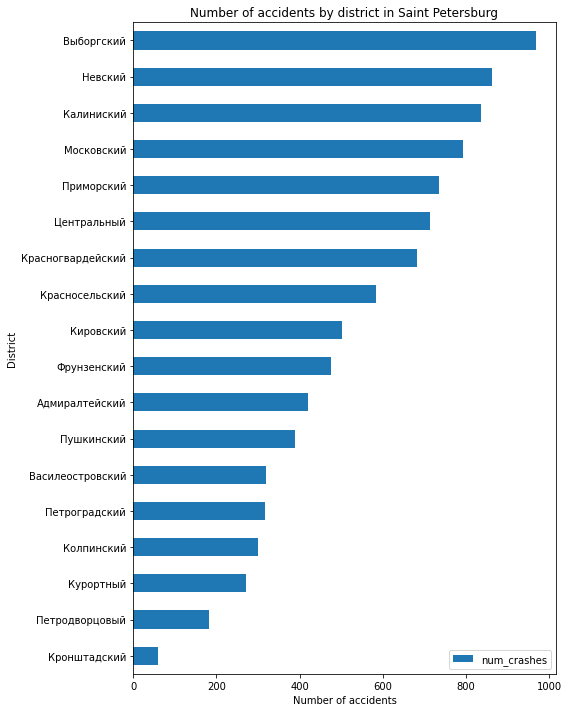

In [ ]:
result_spb = geo_dis_city(spb_districts_ids, spb_name, spb_area, df, 'Санкт-Петербург')

In [ ]:
result_spb

ТОП УЛИЦ ПО ДТП

In [ ]:
df_spb = df[df['City'] == 'Санкт-Петербург']

In [ ]:
df_spb = df_spb.dropna(subset=['lat', 'long'])

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim


df_spb.dropna(subset=['lat', 'long'], inplace=True)


geolocator = Nominatim(user_agent='my-application')


addresses = df_spb.apply(lambda x: geolocator.reverse(f"{x['lat']}, {x['long']}"), axis=1)


df_spb['street_name'] = addresses.apply(lambda x: x.raw.get('address', {}).get('road'))


grouped = df_spb.groupby('street_name').size().reset_index(name='accidents_count')


most_dangerous_street = grouped.sort_values('accidents_count', ascending=False).iloc[0]['street_name']
print(f"The most dangerous street in St. Petersburg is {most_dangerous_street}.")


The most dangerous street in St. Petersburg is КАД.


In [ ]:
grouped = df_spb.groupby('street_name').size().reset_index(name='accidents_count').sort_values('accidents_count', ascending=False).head(3)

In [ ]:
top3_streets = grouped['street_name'].to_list()

In [ ]:
top3_streets

['КАД', 'проспект Энгельса', 'Приморское шоссе']

In [ ]:
import folium


SPB_COORDINATES = (59.9386300, 30.3141300)


m = folium.Map(location=SPB_COORDINATES, zoom_start=11)

colors = {
    top3_streets[0]: 'red',
    top3_streets[1]: 'blue',
    top3_streets[2]: 'green'
}


for street in top3_streets:
    street_dtp = df_spb[df_spb['street_name'] == street][['lat', 'long']].values.tolist()
    for dtp in street_dtp:
        folium.Marker(dtp, icon=folium.Icon(color=colors[street])).add_to(m)


m


##Казань

In [ ]:
kazan_districts_ids = [2133462, 2133466, 2133467, 2133463, 2133464, 2133465, 2133461]

kazan_name = ['Вахитовский', 'Приволжский', 'Советский', 'Кировский', 'Московский', 'Ново-Савиновский', 'Авиастроительный']

kazan_area = [25.82, 115.77, 76.87, 108.79, 38.81, 20.66, 38.91]

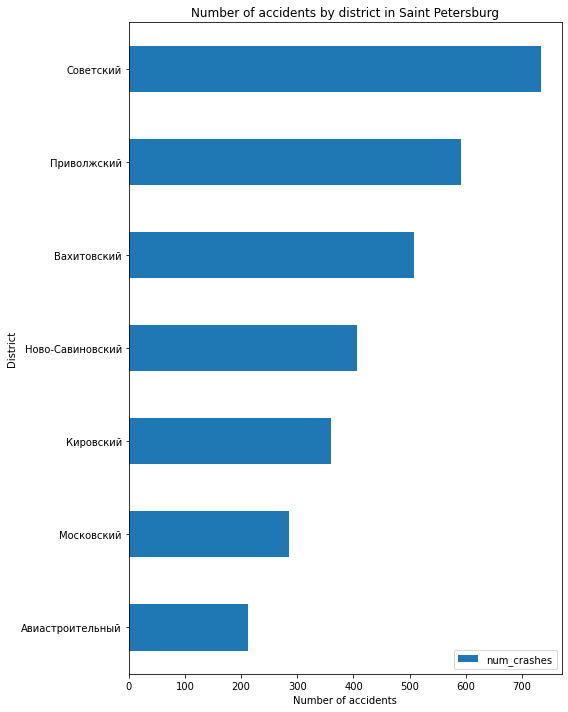

In [ ]:
result_kazan = geo_dis_city(kazan_districts_ids, kazan_name, kazan_area, df, 'Казань')

In [ ]:
result_kazan

ТОП УЛИЦ ПО ДТП

In [ ]:
df_kazan = df[df['City'] == 'Казань']
df_kazan = df_kazan.dropna(subset=['lat', 'long'])

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

df_kazan.dropna(subset=['lat', 'long'], inplace=True)
geolocator = Nominatim(user_agent='my-application')

addresses = df_kazan.apply(lambda x: geolocator.reverse(f"{x['lat']}, {x['long']}"), axis=1)
df_kazan['street_name'] = addresses.apply(lambda x: x.raw.get('address', {}).get('road'))

grouped = df_kazan.groupby('street_name').size().reset_index(name='accidents_count')


most_dangerous_street = grouped.sort_values('accidents_count', ascending=False).iloc[0]['street_name']
print(f"The most dangerous street in KAZAN is {most_dangerous_street}.")


The most dangerous street in KAZAN is проспект Победы.


In [ ]:
grouped = df_kazan.groupby('street_name').size().reset_index(name='accidents_count').sort_values('accidents_count', ascending=False).head(3)
top3_streets_kazan = grouped['street_name'].to_list()

In [ ]:
top3_streets_kazan

['проспект Победы', 'проспект Ямашева', 'улица Декабристов']

In [ ]:
import folium


KAZAN_COORDINATES = (55.7887, 49.1221)


m = folium.Map(location=KAZAN_COORDINATES, zoom_start=11)


colors = {
    top3_streets_kazan[0]: 'red',
    top3_streets_kazan[1]: 'blue',
    top3_streets_kazan[2]: 'green'
}


for street in top3_streets_kazan:
    street_dtp = df_kazan[df_kazan['street_name'] == street][['lat', 'long']].values.tolist()
    for dtp in street_dtp:
        folium.Marker(dtp, icon=folium.Icon(color=colors[street])).add_to(m)


m


## Барнаул

In [ ]:
barnaul_districts_ids = [4475886, 4024771, 4030715, 3224888, 4028307]

barnaul_name = ['Ленинский', 'Октябрьский', 'Индустриальный', 'Центральный', 'Железнодорожный']

barnaul_area = [25.82, 115.77, 76.87, 108.79, 38.81]

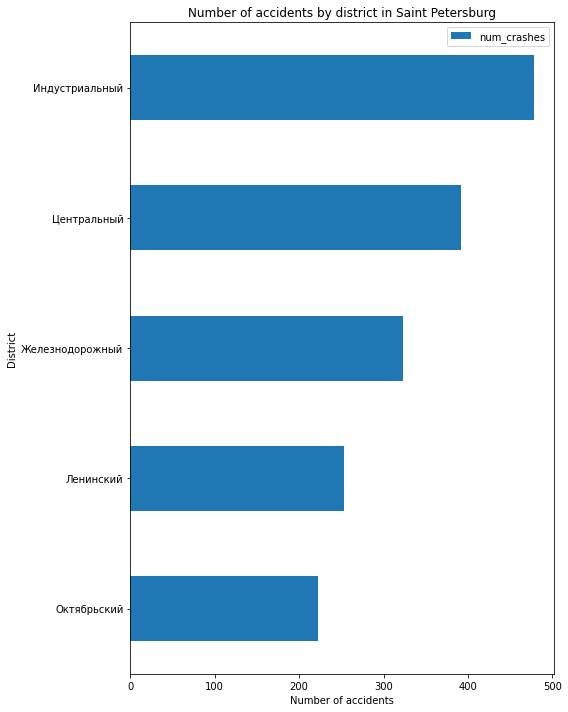

In [ ]:
result_barnaul = geo_dis_city(barnaul_districts_ids, barnaul_name, barnaul_area, df, 'Барнаул')

In [ ]:
result_barnaul

ТОП УЛИЦ ПО ДТП

In [ ]:
df_barnaul = df[df['City'] == 'Барнаул']
df_barnaul = df_barnaul.dropna(subset=['lat', 'long'])

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my-application')

addresses = df_barnaul.apply(lambda x: geolocator.reverse(f"{x['lat']}, {x['long']}"), axis=1)
df_barnaul['street_name'] = addresses.apply(lambda x: x.raw.get('address', {}).get('road'))

grouped = df_barnaul.groupby('street_name').size().reset_index(name='accidents_count')

most_dangerous_street = grouped.sort_values('accidents_count', ascending=False).iloc[0]['street_name']
print(f"The most dangerous street in BARNAUL is {most_dangerous_street}.")


The most dangerous street in BARNAUL is проспект Ленина.


In [ ]:
top3_streets_barnaul 

['проспект Ленина', 'улица Попова', 'улица Малахова']

In [ ]:
grouped = df_barnaul.groupby('street_name').size().reset_index(name='accidents_count').sort_values('accidents_count', ascending=False).head(3)
top3_streets_barnaul = grouped['street_name'].to_list()

In [ ]:
import folium



BARNAUL_COORDINATES = (53.3605600, 83.7636100)

m = folium.Map(location=BARNAUL_COORDINATES, zoom_start=11)


colors = {
    top3_streets_barnaul[0]: 'red',
    top3_streets_barnaul[1]: 'blue',
    top3_streets_barnaul[2]: 'green'
}


for street in top3_streets_barnaul:
    street_dtp = df_barnaul[df_barnaul['street_name'] == street][['lat', 'long']].values.tolist()
    for dtp in street_dtp:
        folium.Marker(dtp, icon=folium.Icon(color=colors[street])).add_to(m)


m


# **Графики ДТП по 3 категориям городов**

In [ ]:
df_1 = df.copy()

df_1['day_of_week'] = df_1['datetime'].dt.dayofweek

# добавление столбца часа
df_1['hour'] = df_1['datetime'].dt.hour

df_1['month'] = df_1['datetime'].dt.month

In [ ]:
df_big = df_1[df_1['category_of_city'] == 'Большой']
df_mid = df_1[df_1['category_of_city'] == 'Средний']
df_small = df_1[df_1['category_of_city'] == 'Малый']

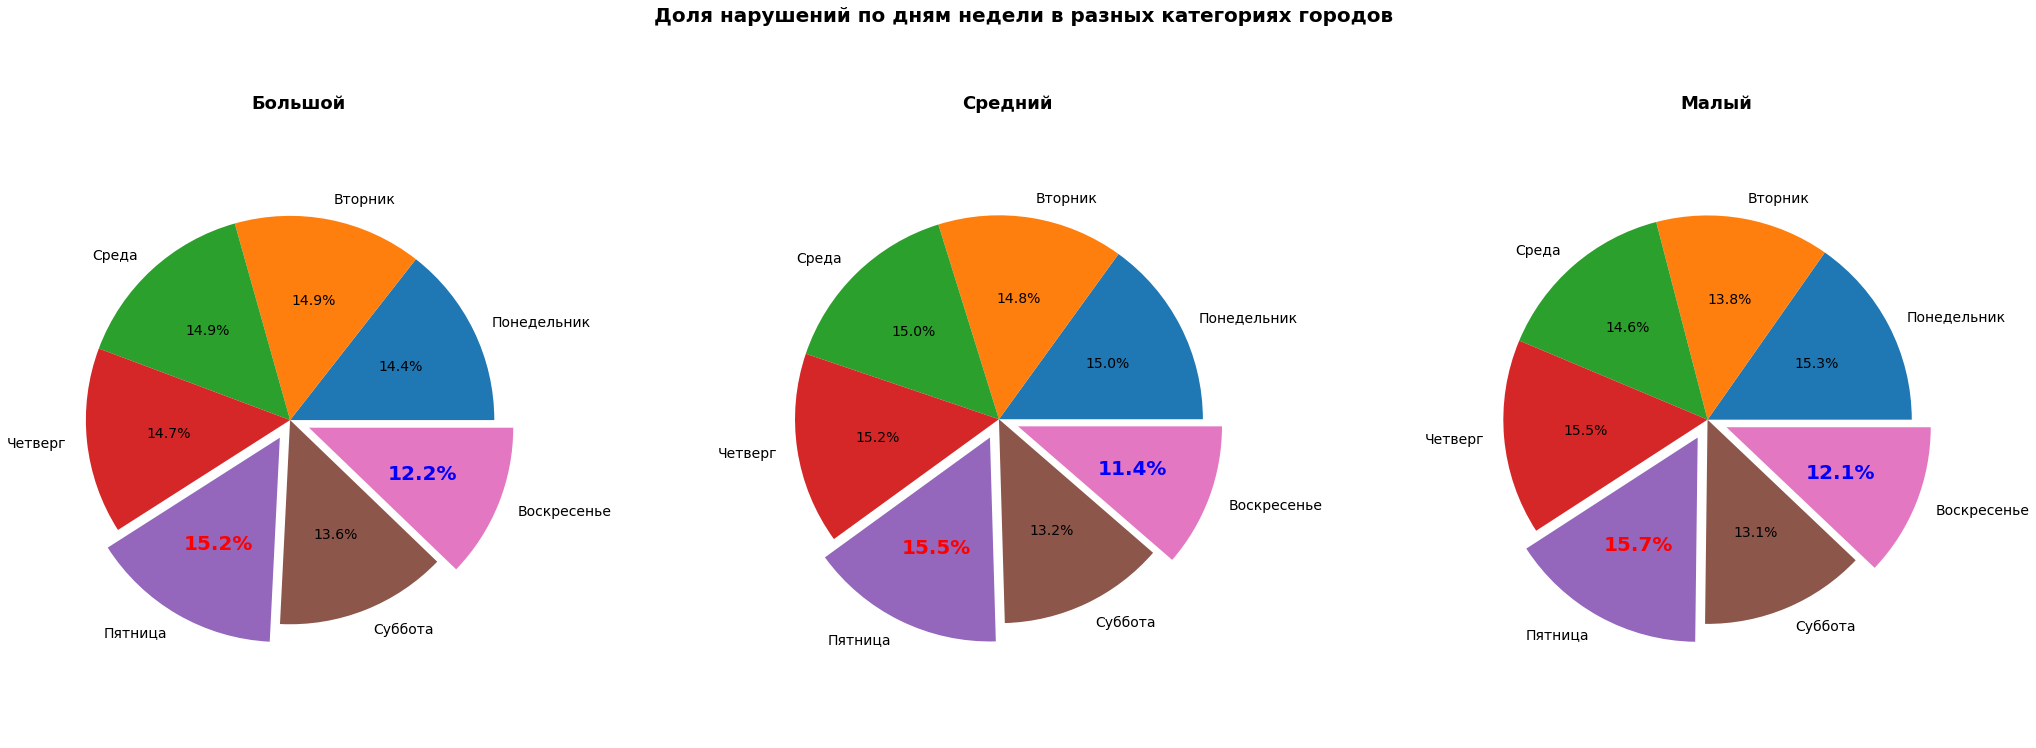

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание списка категорий города
city_categories = df_1['category_of_city'].unique()
labels = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
# Создание сетки из трех графиков по категориям города
fig, axes = plt.subplots(nrows=1, ncols=len(city_categories), figsize=(30,15))

fig.suptitle('Доля нарушений по дням недели в разных категориях городов', fontsize=20, x = 0.57, fontweight='bold')
# Итерация по списку категорий города и создание для каждой категории круговой диаграммы
fig.subplots_adjust(wspace=0.5, right=1.0)
fig.subplots_adjust(bottom = 0.3)
for i, category in enumerate(city_categories):
    # Фильтрация данных по категории города
    filtered_data = df_1[df_1['category_of_city'] == category]
    
    # Группировка данных по дням недели и подсчет количества нарушений в каждом дне
    violation_by_day = filtered_data.groupby('day_of_week').size().reset_index(name='count')
    
    # Создание круговой диаграммы
    ax = axes[i]
    ax.set_title(category)

    # Создание массива для определения, какие сектора нужно выделить
    explode = [0] * len(violation_by_day)
    # Находим индекс сектора с наименьшим значением и помечаем его значением 0.1
    min_idx = violation_by_day['count'].idxmin()
    explode[min_idx] = 0.1
    # Находим индекс сектора с наибольшим значением и помечаем его значением 0.1
    max_idx = violation_by_day['count'].idxmax()
    explode[max_idx] = 0.1

    # Создание круговой диаграммы с помощью plt.pie
    patches, texts, autotexts = ax.pie(violation_by_day['count'], labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
    ax.axis('equal')
    ax.set_title(category, fontsize=18, fontweight='bold')

    # Добавление подписей к секторам, которые были выделены
    autotexts[min_idx].set_color('blue')
    autotexts[min_idx].set_fontweight('bold')
    autotexts[max_idx].set_color('red')
    autotexts[max_idx].set_fontweight('bold')
    autotexts[min_idx].set_fontsize(20)
    autotexts[max_idx].set_fontsize(20)



# Отображение графиков
plt.show()

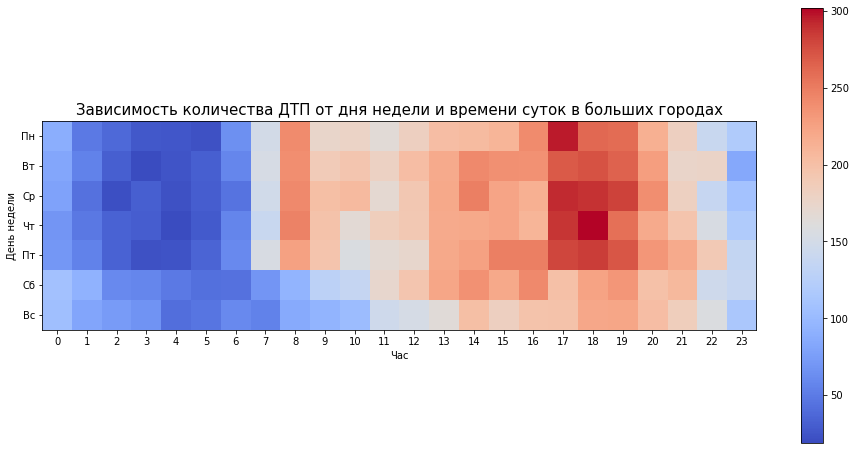

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# преобразование столбца datetime в формат datetime

fig, ax = plt.subplots(figsize=(16, 8))

# создание сводной таблицы
pivot = pd.pivot_table(df_big, values='id', index='day_of_week', columns='hour', aggfunc='count')

# создание тепловой карты
plt.imshow(pivot, cmap='coolwarm')
plt.colorbar()

# настройка осей
plt.xticks(range(24))
plt.yticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel('Час')
plt.ylabel('День недели')

# добавление заголовка
plt.title('Зависимость количества ДТП от дня недели и времени суток в больших городах', fontsize = 15)

# отображение графика
plt.show()


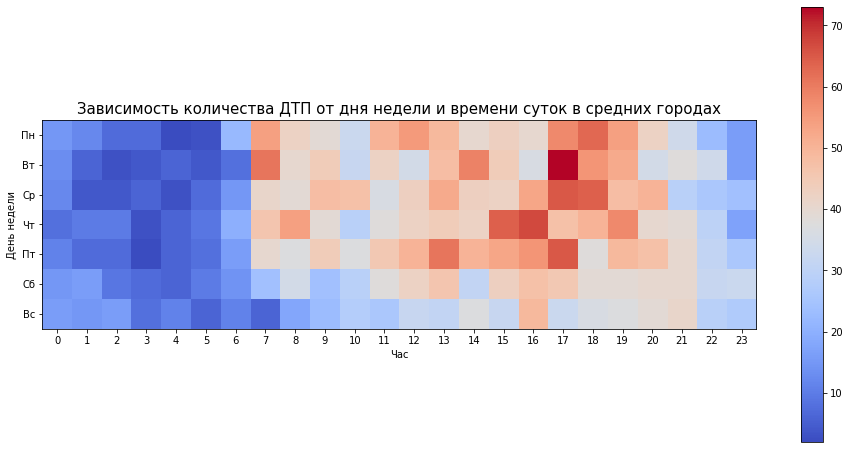

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# преобразование столбца datetime в формат datetime

fig, ax = plt.subplots(figsize=(16, 8))

# создание сводной таблицы
pivot = pd.pivot_table(df_mid, values='id', index='day_of_week', columns='hour', aggfunc='count')

# создание тепловой карты
plt.imshow(pivot, cmap='coolwarm')
plt.colorbar()

# настройка осей
plt.xticks(range(24))
plt.yticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel('Час')
plt.ylabel('День недели')

# добавление заголовка
plt.title('Зависимость количества ДТП от дня недели и времени суток в средних городах', fontsize = 15)

# отображение графика
plt.show()


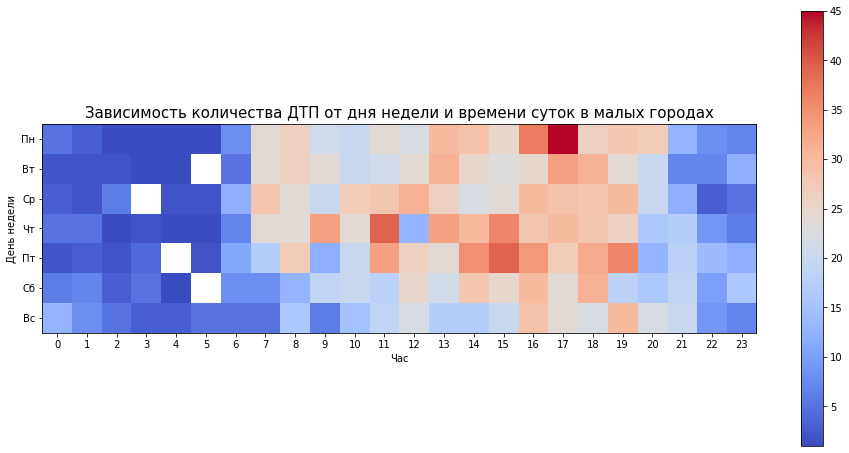

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# преобразование столбца datetime в формат datetime

fig, ax = plt.subplots(figsize=(16, 8))

# создание сводной таблицы
pivot = pd.pivot_table(df_small, values='id', index='day_of_week', columns='hour', aggfunc='count')

# создание тепловой карты
plt.imshow(pivot, cmap='coolwarm')
plt.colorbar()

# настройка осей
plt.xticks(range(24))
plt.yticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel('Час')
plt.ylabel('День недели')

# добавление заголовка
plt.title('Зависимость количества ДТП от дня недели и времени суток в малых городах', fontsize = 15)

# отображение графика
plt.show()


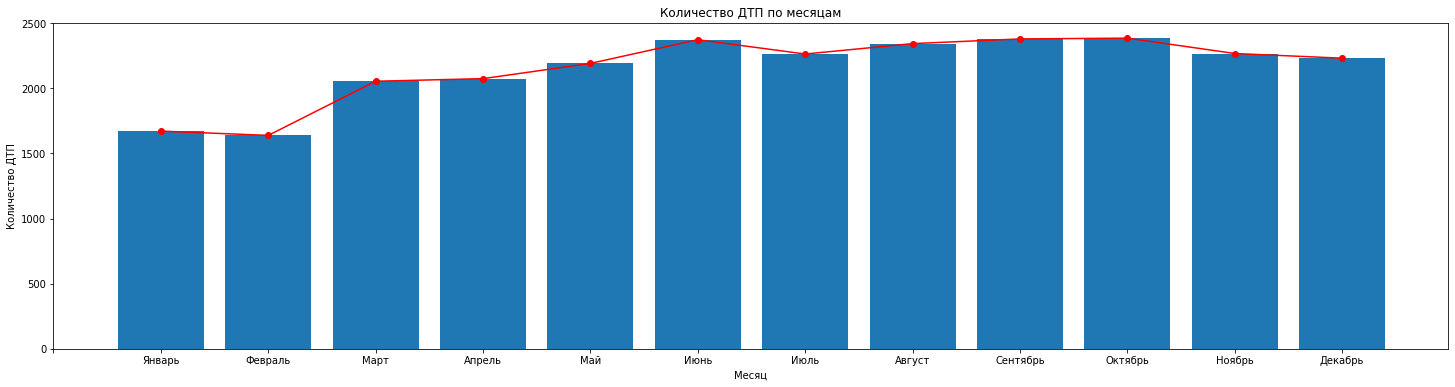

In [ ]:
import matplotlib.pyplot as plt

# Группировка данных по месяцам и подсчет количества ДТП в каждом месяце
accidents_by_month = df_big.groupby('month').size()

months = ['', "Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
# Создание гистограммы
fig, ax = plt.subplots(figsize=(25,6))
ax.bar(accidents_by_month.index, accidents_by_month)

# Добавление линии, проходящей через вершины гистограммы
ax.plot(accidents_by_month.index, accidents_by_month, '-o', color='red')

# Настройка осей и заголовков
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество ДТП')
ax.set_title('Количество ДТП по месяцам')

plt.xticks(range(len(months)), months)
# Отображение графика
plt.show()


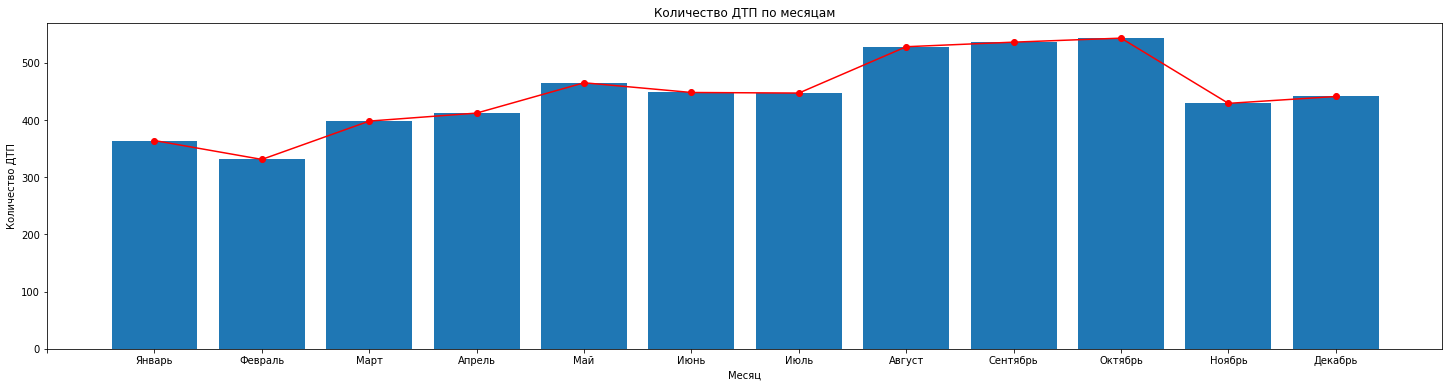

In [ ]:
import matplotlib.pyplot as plt

# Группировка данных по месяцам и подсчет количества ДТП в каждом месяце
accidents_by_month = df_mid.groupby('month').size()

months = ['', "Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
# Создание гистограммы
fig, ax = plt.subplots(figsize=(25,6))
ax.bar(accidents_by_month.index, accidents_by_month)

# Добавление линии, проходящей через вершины гистограммы
ax.plot(accidents_by_month.index, accidents_by_month, '-o', color='red')

# Настройка осей и заголовков
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество ДТП')
ax.set_title('Количество ДТП по месяцам')

plt.xticks(range(len(months)), months)
# Отображение графика
plt.show()


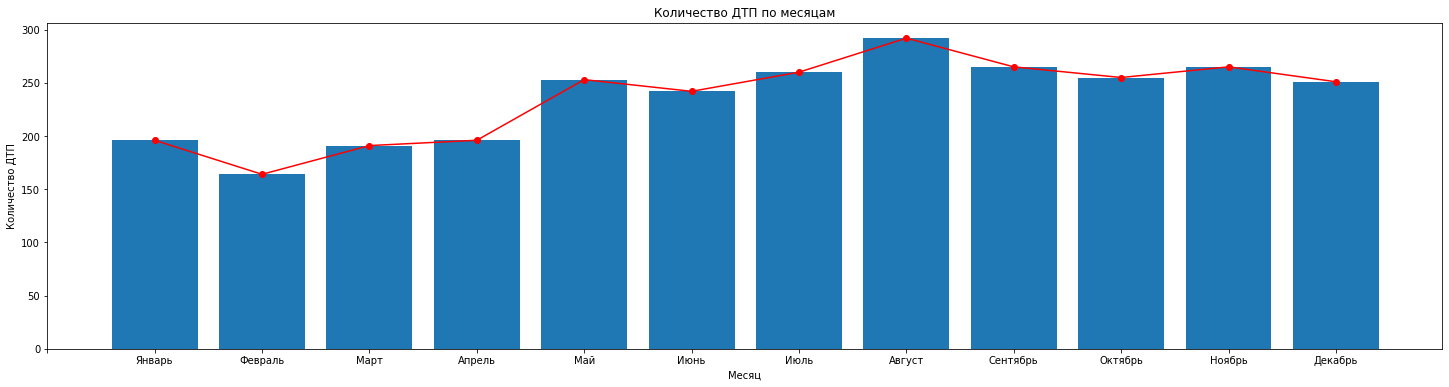

In [ ]:
import matplotlib.pyplot as plt

# Группировка данных по месяцам и подсчет количества ДТП в каждом месяце
accidents_by_month = df_small.groupby('month').size()

months = ['', "Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
# Создание гистограммы
fig, ax = plt.subplots(figsize=(25,6))
ax.bar(accidents_by_month.index, accidents_by_month)

# Добавление линии, проходящей через вершины гистограммы
ax.plot(accidents_by_month.index, accidents_by_month, '-o', color='red')

# Настройка осей и заголовков
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество ДТП')
ax.set_title('Количество ДТП по месяцам')

plt.xticks(range(len(months)), months)
# Отображение графика
plt.show()


#**Графики ДТП со смертельным исходом**

In [ ]:
df_dead = df_1[df_1['dead_count'] > 0]

Теперь посчитаем сколько процентов составляет ДТП со смертельным исходом от всего кол-ва ДТП

In [ ]:
t = df_dead.shape[0] / df.shape[0] * 100

print(str(round(t, 2)) + ' % ' + ' ДТП со смертельным исходом' )

3.77 %  ДТП со смертельным исходом


Из-за того что на кол-во всей выборки менее 4% имеют литальный исход, было принято решение рассматривать все города вместе

ДАТА И ЧАС СМЕРТИ

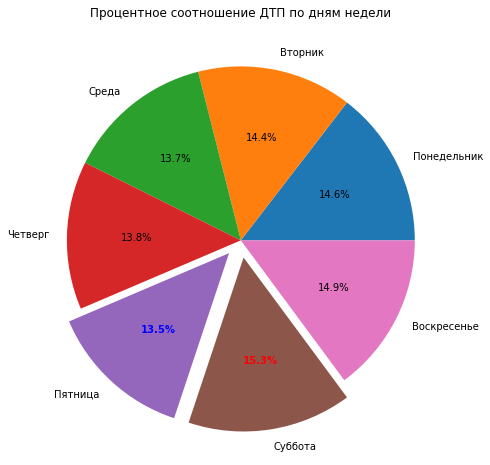

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Группировка данных по дням недели и подсчет количества ДТП в каждый день
violation_by_day = df_dead.groupby('day_of_week').size().reset_index(name='count')

# Вычисление процентного соотношения
violation_by_day['percent'] = violation_by_day['count'] / violation_by_day['count'].sum() * 100

# Создание массива для определения, какие сектора нужно выделить
explode = [0] * len(violation_by_day)
# Находим индекс сектора с наименьшим значением и помечаем его значением 0.1
min_idx = violation_by_day['percent'].idxmin()
explode[min_idx] = 0.1
# Находим индекс сектора с наибольшим значением и помечаем его значением 0.1
max_idx = violation_by_day['percent'].idxmax()
explode[max_idx] = 0.1

# Создание круговой диаграммы с помощью plt.pie
labels = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = ax.pie(violation_by_day['percent'], labels=labels, autopct='%1.1f%%', explode=explode)

# Добавление подписей к секторам, которые были выделены
autotexts[min_idx].set_color('blue')
autotexts[min_idx].set_fontweight('bold')
autotexts[max_idx].set_color('red')
autotexts[max_idx].set_fontweight('bold')

# Добавление заголовка
ax.set_title('Процентное соотношение ДТП по дням недели')

# Отображение графика
plt.show()


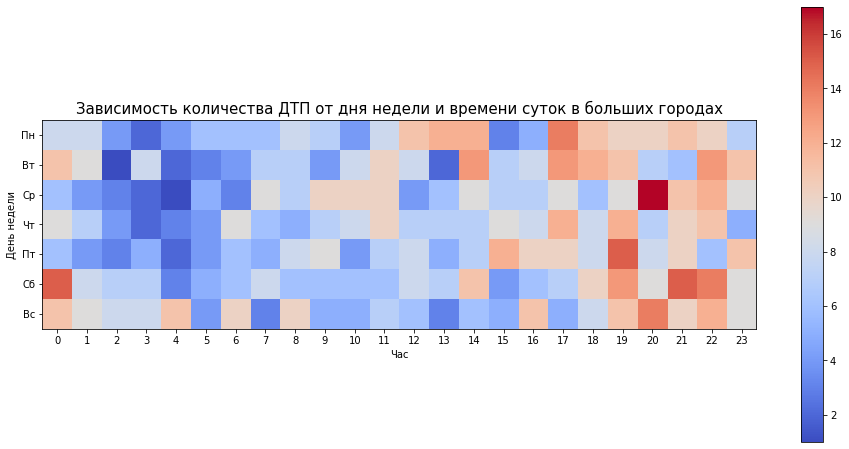

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# преобразование столбца datetime в формат datetime

fig, ax = plt.subplots(figsize=(16, 8))

# создание сводной таблицы
pivot = pd.pivot_table(df_dead, values='id', index='dayofweek', columns='hour', aggfunc='count')

# создание тепловой карты
plt.imshow(pivot, cmap='coolwarm')
plt.colorbar()

# настройка осей
plt.xticks(range(24))
plt.yticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel('Час')
plt.ylabel('День недели')

# добавление заголовка
plt.title('Зависимость количества ДТП от дня недели и времени суток во всех городах', fontsize = 15)

# отображение графика
plt.show()


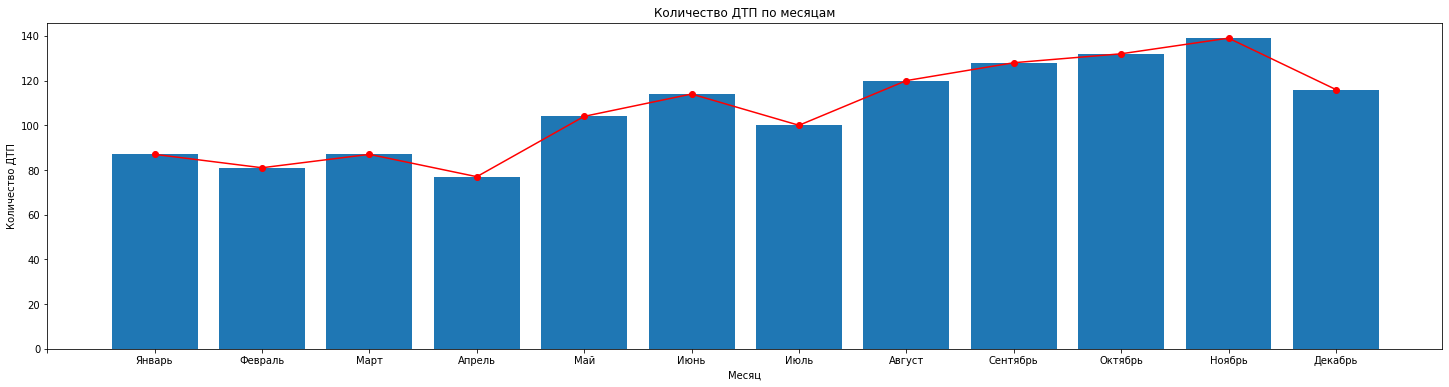

In [ ]:
import matplotlib.pyplot as plt

# Группировка данных по месяцам и подсчет количества ДТП в каждом месяце
accidents_by_month = df_dead.groupby('month').size()

months = ['', "Январь", "Февраль", "Март", "Апрель", "Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]
# Создание гистограммы
fig, ax = plt.subplots(figsize=(25,6))
ax.bar(accidents_by_month.index, accidents_by_month)

# Добавление линии, проходящей через вершины гистограммы
ax.plot(accidents_by_month.index, accidents_by_month, '-o', color='red')

# Настройка осей и заголовков
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество ДТП')
ax.set_title('Количество ДТП по месяцам')

plt.xticks(range(len(months)), months)
# Отображение графика
plt.show()
